### Is it possible to detect malicious pages using URL features? _dmozblack_
teste_Todas

In [7]:
import tensorflow

__Etapas__:

* Análise de Dados

* Transformação dos Dados
    * Conversão para Números
    * Conversão para Binários
    
* Resultados
    * Treinamento e Classificação




Accuracy

## Códigos base para implementação de AM e de rede neural em Keras

In [8]:
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import pandas as pd
import time
import os
from sklearn import datasets, svm, metrics
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score as sklearn_roc_auc_score
from sklearn.metrics import accuracy_score as sklearn_accuracy_score
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [9]:
from keras import backend as K
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from keras.models import Model
from keras.optimizers import Nadam, SGD,Adam
from keras.callbacks import EarlyStopping
import seaborn as sns

## Analise dos Dados da Base

#### A base do _detect malicious pages using URL_ foi utilizada como fonte de informação para que os algoritmos de aprendizadem de máquina e de redes neurais gerem modelos que prevejam se URL é maliciosa ou não.
#### Para analisa os dados da base é necessário importá-la.

In [10]:
base_path='base_URL/basedmoz_blacklist_20mil.csv'
base = pd.read_csv(base_path)

### Para mostrar os 5 primeiros registros usamos a função 'head()'

In [11]:
base.head()

,qt_tok_dom_ponto,qt_tok_dom_hifen,qt_tok_dom_underline,qt_tok_dir_ponto,qt_tok_dir_barra,qt_tok_dir_interrog,qt_tok_dir_igualdade,qt_tok_dir_hifen,qt_tok_dir_underline,qt_tok_dir_arroba,...,mal_phi,presenca_marca,ip_assoc,sn_assoc,data_tempo_ativo,geo_localizacao,rank_google,rank_alexa,rbl_check,classe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,4824,US,5,115,0,benigna
1,2,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,GB,5,2,8,benigna
2,2,0,0,0,2,0,0,0,0,0,...,0,1,1,2,3000,US,4,4,8,benigna
3,2,1,0,0,3,0,0,0,0,0,...,0,3,1,2,4462,US,5,12,8,benigna
4,2,1,0,0,0,0,0,0,0,0,...,0,0,1,2,3551,US,4,6,8,benigna


In [13]:
colunas = base.drop(['classe'], axis=1).columns
colunas

Index(['qt_tok_dom_ponto', 'qt_tok_dom_hifen', 'qt_tok_dom_underline',
       'qt_tok_dir_ponto', 'qt_tok_dir_barra', 'qt_tok_dir_interrog',
       'qt_tok_dir_igualdade', 'qt_tok_dir_hifen', 'qt_tok_dir_underline',
       'qt_tok_dir_arroba', 'qt_tok_dir_exclam', 'at_tok_dir_til',
       'qt_tok_arq_ponto', 'qt_tok_arq_interrog', 'qt_tok_arq_igualdade',
       'qt_tok_arq_hifen', 'qt_tok_arq_underline', 'qt_tok_arq_arroba',
       'qt_tok_arq_exclam', 'at_tok_arq_til', 'qt_tok_par_ponto',
       'qt_tok_par_barra', 'qt_tok_par_interrog', 'qt_tok_par_igualdade',
       'qt_tok_par_hifen', 'qt_tok_par_underline', 'qt_tok_par_arroba',
       'qt_tok_par_ecomerc', 'qt_tok_par_exclam', 'at_tok_par_til',
       'qt_params', 'qt_tok_url_ponto', 'qt_tok_url_barra',
       'qt_tok_url_interrog', 'qt_tok_url_igualdade', 'qt_tok_url_hifen',
       'qt_tok_url_underline', 'qt_tok_url_arroba', 'qt_tok_url_ecomerc',
       'qt_tok_url_exclam', 'at_tok_url_til', 'pres_tld_arg', 'comp_dominio',
     

### Abaixo seguem os histogramas dos atributos númericos

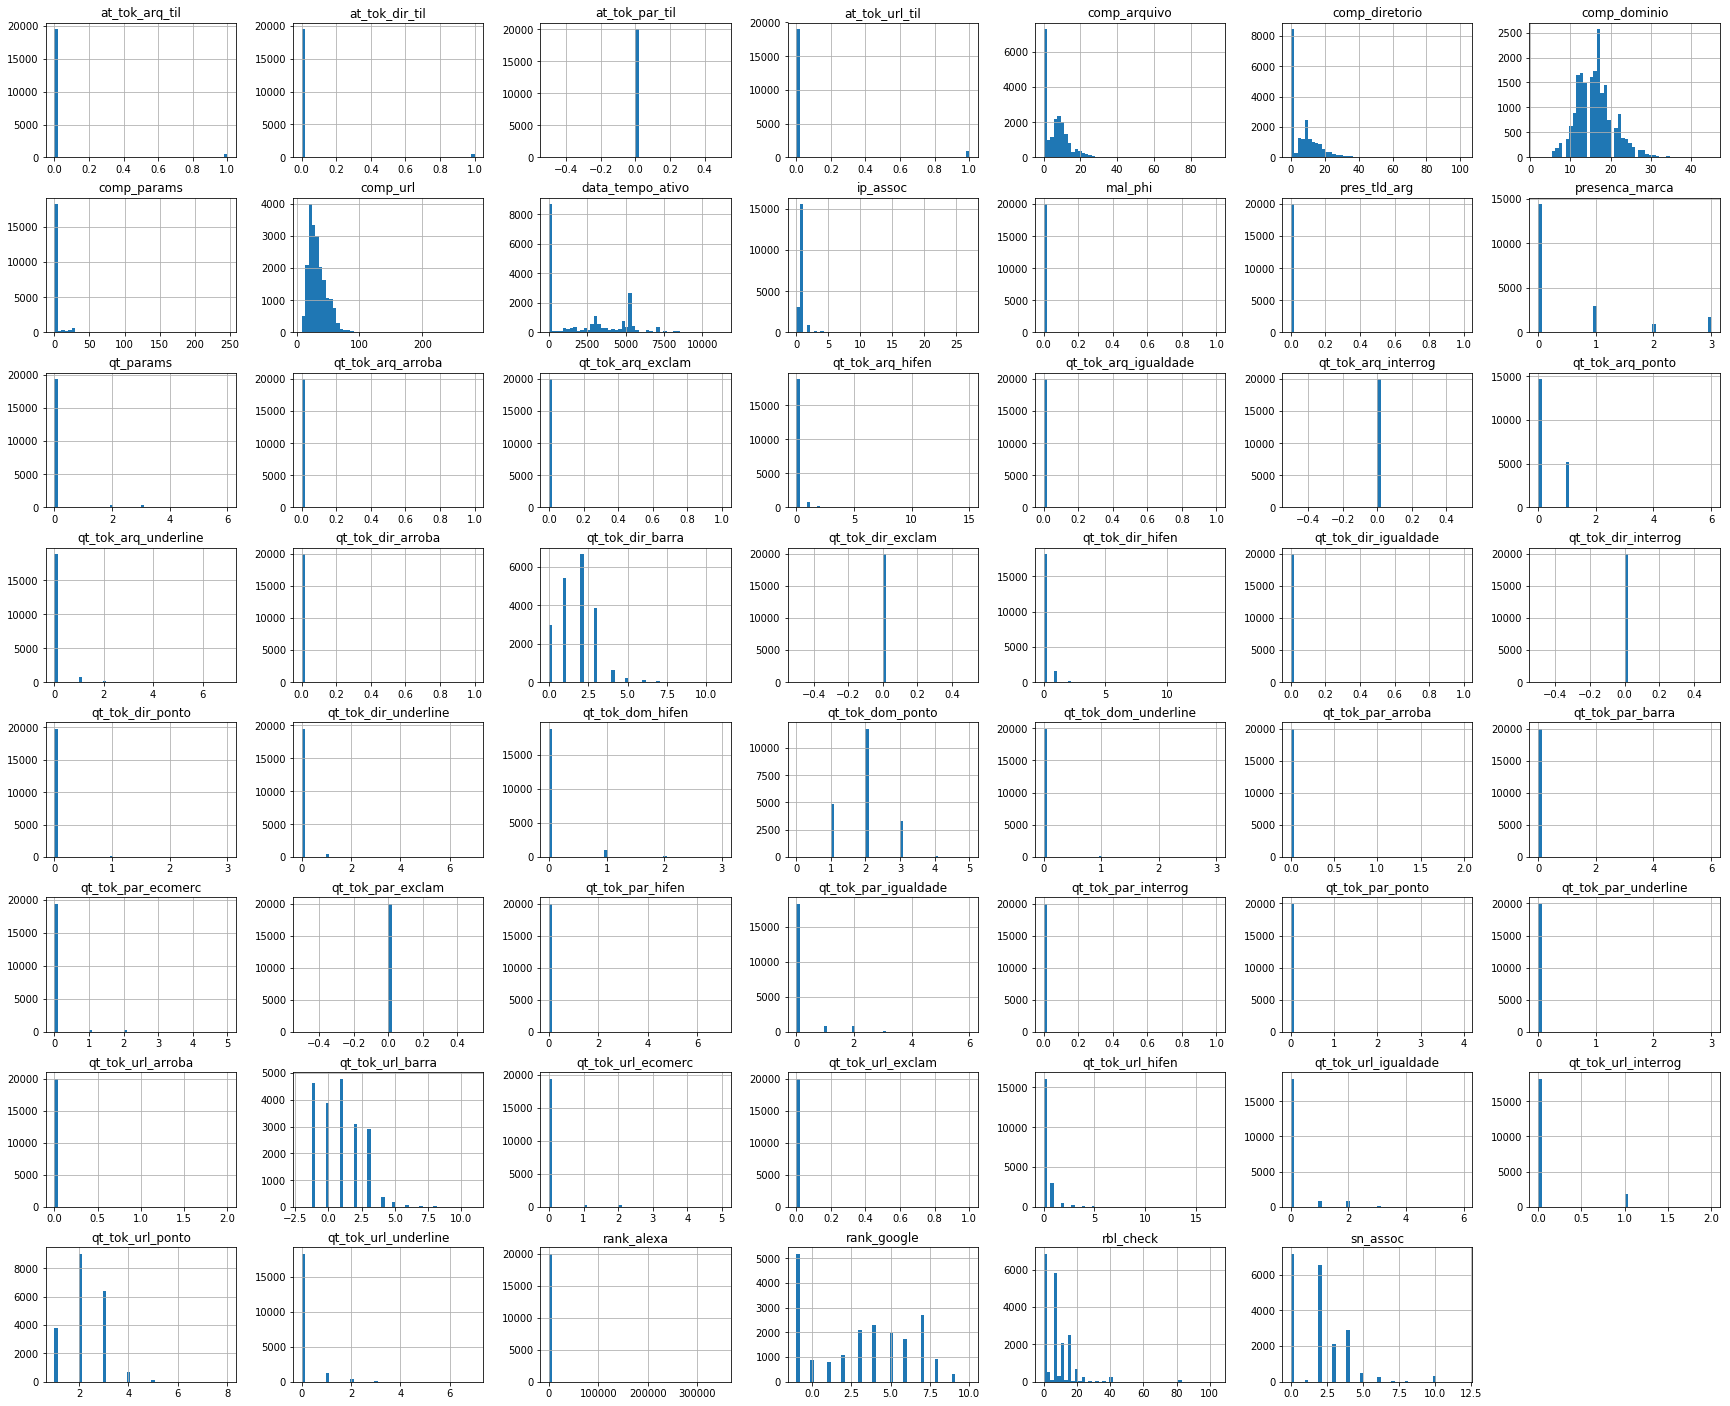

In [14]:
base.hist(bins=50, figsize=(30,25))
plt.show()

## Transformação dos Dados

### Conversão para binários

In [15]:
for c in colunas:
    dummies = pd.get_dummies(base[c], prefix = c)
    base = base.drop(c, axis = 1).join(dummies)

In [16]:
base.head(3)

,classe,qt_tok_dom_ponto_0,qt_tok_dom_ponto_1,qt_tok_dom_ponto_2,qt_tok_dom_ponto_3,qt_tok_dom_ponto_4,qt_tok_dom_ponto_5,qt_tok_dom_hifen_0,qt_tok_dom_hifen_1,qt_tok_dom_hifen_2,...,rbl_check_64,rbl_check_72,rbl_check_73,rbl_check_77,rbl_check_78,rbl_check_79,rbl_check_80,rbl_check_81,rbl_check_82,rbl_check_104
0,benigna,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,benigna,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,benigna,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


A função 'get_dummies' transforma os campos em atributos binários. Logo, podemos incorporar esses novos campos ao dataframe

In [17]:
base['classe'] = base['classe'].astype('category').cat.codes

transforma a class em número

In [18]:
base.head()

,classe,qt_tok_dom_ponto_0,qt_tok_dom_ponto_1,qt_tok_dom_ponto_2,qt_tok_dom_ponto_3,qt_tok_dom_ponto_4,qt_tok_dom_ponto_5,qt_tok_dom_hifen_0,qt_tok_dom_hifen_1,qt_tok_dom_hifen_2,...,rbl_check_64,rbl_check_72,rbl_check_73,rbl_check_77,rbl_check_78,rbl_check_79,rbl_check_80,rbl_check_81,rbl_check_82,rbl_check_104
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
base.classe.value_counts()

1    10000
0    10000
Name: classe, dtype: int64

Exibe a quantidade de linhas e colunas (atributos)

In [20]:
y = base['classe'].values
X = base.drop("classe", axis=1).values

In [21]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int8)

In [22]:
X.shape

(20000, 3497)

In [23]:
X[:1]

array([[0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [24]:
y.shape

(20000,)

In [25]:
y[:1]

array([0], dtype=int8)

## Resultados

Os experimentos foram executados para cada algoritmos: Random Forest, SVM, Naive Bayes, Decision Trees, Nearest Neighbors, Rede Neural Simples, Rede Neural com normalização em Batch, Rede Neural com Dropout e Rede Neural com normalização em Batch e Dropout. Foi utilizado Kfolds k=10 dividir a base em 10 subconjuntos (treinamento e teste).

Validação cruzada K-Folds
Fornece índices de treino / teste para dividir os dados nos conjuntos de treinamento / teste. Dividir o conjunto de dados em k dobras consecutivas (sem embaralhar por padrão). Cada dobra é então usada uma vez como validação, enquanto as dobras remanescentes k - 1 formam o conjunto de treino.

No aprendizado de máquina, geralmente dividimos o conjunto de dados em conjunto de dados de treinamento, conjunto de dados de validação e conjunto de dados de teste.

In [26]:
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X,y)
print(kf)
#KFold(n_splits=10, random_state=None, shuffle=False)
#for train_index, test_index in kf.split(X):
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


# Algoritmos de Aprendizagem de Máquina

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
n_estimators = 300
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=50)
    clf_rf.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_rf.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)


labels = {'n_estimators':n_estimators, 'accuracy_rf':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/random_forest_dmozblack_.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))



0.9843
0.986147359967878
0.9824
0.9842701132151087
[[9862  138]
 [ 176 9824]]
934.7943160533905


Feature Importance

In [29]:
for name, importance in zip(base.drop("classe", axis=1).columns, clf_rf.feature_importances_):
    print(name,importance)

qt_tok_dom_ponto_0 8.999122112286093e-05
qt_tok_dom_ponto_1 0.03161362651602446
qt_tok_dom_ponto_2 0.041502824223578226
qt_tok_dom_ponto_3 0.005694483641876388
qt_tok_dom_ponto_4 0.0003732115665406684
qt_tok_dom_ponto_5 4.944667149596047e-05
qt_tok_dom_hifen_0 0.000846517400059945
qt_tok_dom_hifen_1 0.0008134295859132098
qt_tok_dom_hifen_2 9.652135624240409e-05
qt_tok_dom_hifen_3 1.8752826553685968e-05
qt_tok_dom_underline_0 0.00044610388880549735
qt_tok_dom_underline_1 0.00024115666644955236
qt_tok_dom_underline_2 2.004244526888144e-05
qt_tok_dom_underline_3 1.203488090392986e-06
qt_tok_dir_ponto_0 0.0006184733120834975
qt_tok_dir_ponto_1 0.0004993728454423339
qt_tok_dir_ponto_2 0.0002130317090213457
qt_tok_dir_ponto_3 2.6952287354122483e-05
qt_tok_dir_barra_0 0.029071800096706048
qt_tok_dir_barra_1 0.037707488718304934
qt_tok_dir_barra_2 0.015998517991675575
qt_tok_dir_barra_3 0.01811211692966988
qt_tok_dir_barra_4 0.003634559235549005
qt_tok_dir_barra_5 0.0009229554411820583
qt_tok_

mal_phi_1 4.0917024708370707e-05
presenca_marca_0 0.005530752088811896
presenca_marca_1 0.009032173445695226
presenca_marca_2 0.0018250622256817677
presenca_marca_3 0.0026961968696250665
ip_assoc_0 0.01700504730579496
ip_assoc_1 0.016529029297431563
ip_assoc_2 0.001527904324625521
ip_assoc_3 0.0005519830118801188
ip_assoc_4 0.0002993520801030073
ip_assoc_5 0.00025804446296997277
ip_assoc_6 0.0001038878089197391
ip_assoc_8 7.862710554201659e-05
ip_assoc_9 1.4832968262896266e-05
ip_assoc_10 7.908611935396326e-06
ip_assoc_11 3.280721254827479e-05
ip_assoc_13 1.3435292611527178e-06
ip_assoc_15 8.694646379418175e-05
ip_assoc_27 1.3111099764461235e-07
sn_assoc_0 0.00904374817073514
sn_assoc_1 0.0002834092527040345
sn_assoc_2 0.004362971185721368
sn_assoc_3 0.0020909567490124234
sn_assoc_4 0.0030825891987354592
sn_assoc_5 0.0005555345935342488
sn_assoc_6 0.0003657173293492997
sn_assoc_7 0.00010820145070915604
sn_assoc_8 0.00014326079464916305
sn_assoc_9 4.5997405809728005e-05
sn_assoc_10 0.00

data_tempo_ativo_2232 4.837193448548501e-07
data_tempo_ativo_2238 2.723112522005611e-06
data_tempo_ativo_2242 0.0
data_tempo_ativo_2253 0.0
data_tempo_ativo_2255 1.971280013276029e-06
data_tempo_ativo_2257 1.2964537879687782e-08
data_tempo_ativo_2259 1.6214436623882838e-07
data_tempo_ativo_2264 5.167260399185339e-07
data_tempo_ativo_2266 3.0054750751195025e-06
data_tempo_ativo_2276 7.759215543015833e-07
data_tempo_ativo_2278 0.0
data_tempo_ativo_2281 0.0
data_tempo_ativo_2283 0.0
data_tempo_ativo_2284 2.195054321463486e-06
data_tempo_ativo_2285 1.969806696906491e-06
data_tempo_ativo_2289 9.00764013012787e-06
data_tempo_ativo_2295 6.941088293983803e-06
data_tempo_ativo_2299 2.3916364119644835e-05
data_tempo_ativo_2305 8.24958961779192e-09
data_tempo_ativo_2306 0.0
data_tempo_ativo_2308 5.238017263188407e-07
data_tempo_ativo_2313 2.25286901622432e-07
data_tempo_ativo_2319 1.1032127370740076e-05
data_tempo_ativo_2328 2.562868187664275e-07
data_tempo_ativo_2335 3.928815009179308e-07
data_t

data_tempo_ativo_4101 0.00010421172843421771
data_tempo_ativo_4108 1.849942711801357e-08
data_tempo_ativo_4111 1.7793845138437608e-06
data_tempo_ativo_4117 8.009116276623191e-06
data_tempo_ativo_4118 4.053383774217473e-06
data_tempo_ativo_4119 1.6738711567657198e-05
data_tempo_ativo_4120 1.708450190379651e-05
data_tempo_ativo_4131 7.020022963273383e-08
data_tempo_ativo_4133 4.680360337315525e-06
data_tempo_ativo_4135 0.0
data_tempo_ativo_4136 0.0
data_tempo_ativo_4137 1.3955126562182952e-06
data_tempo_ativo_4140 3.4558988335319745e-06
data_tempo_ativo_4144 0.0
data_tempo_ativo_4147 1.4573755946211945e-06
data_tempo_ativo_4153 3.650977744053227e-05
data_tempo_ativo_4157 4.204601832415854e-07
data_tempo_ativo_4158 1.3002407951325483e-05
data_tempo_ativo_4163 1.580733433070757e-06
data_tempo_ativo_4166 8.638818925850165e-06
data_tempo_ativo_4167 1.9090179117888114e-06
data_tempo_ativo_4168 1.435563453983404e-06
data_tempo_ativo_4171 2.03379445105667e-05
data_tempo_ativo_4172 1.24169743680

data_tempo_ativo_6811 1.672701534119823e-06
data_tempo_ativo_6853 1.6139185609726175e-07
data_tempo_ativo_6895 5.369463789395258e-07
data_tempo_ativo_6921 7.312430792172528e-08
data_tempo_ativo_6936 9.282808915700139e-06
data_tempo_ativo_6972 2.289314642649253e-07
data_tempo_ativo_6984 2.283795808060085e-06
data_tempo_ativo_6990 3.815477274620164e-06
data_tempo_ativo_6994 0.0
data_tempo_ativo_7010 4.390933094603573e-06
data_tempo_ativo_7020 4.1169056807864547e-07
data_tempo_ativo_7057 5.608453736930592e-06
data_tempo_ativo_7070 1.4997474993658808e-05
data_tempo_ativo_7071 1.6804349969774413e-05
data_tempo_ativo_7082 3.61284811941635e-06
data_tempo_ativo_7089 1.3201177910310317e-05
data_tempo_ativo_7091 6.2437542296511355e-06
data_tempo_ativo_7108 9.813760621772376e-07
data_tempo_ativo_7122 0.0
data_tempo_ativo_7123 1.2818078422241382e-05
data_tempo_ativo_7125 1.0934831889705465e-05
data_tempo_ativo_7127 0.0
data_tempo_ativo_7131 1.2301171301399507e-05
data_tempo_ativo_7160 2.8080673416

rank_alexa_127 5.966016532648916e-06
rank_alexa_128 1.886342190875398e-05
rank_alexa_129 4.741095337515503e-05
rank_alexa_130 1.1944576034345461e-06
rank_alexa_131 3.0007701234659745e-05
rank_alexa_132 2.3503994119997793e-05
rank_alexa_133 2.1877112908511e-05
rank_alexa_134 4.785611097586164e-06
rank_alexa_135 8.147752284034383e-06
rank_alexa_136 0.00010910405827084933
rank_alexa_137 1.9177843472342492e-06
rank_alexa_138 6.948060224556244e-06
rank_alexa_139 2.2583451956172367e-05
rank_alexa_140 0.000308000501128484
rank_alexa_141 8.266046984933686e-07
rank_alexa_142 7.616750711422884e-06
rank_alexa_143 2.9842826286606635e-05
rank_alexa_144 0.00024182586996574908
rank_alexa_145 5.8346194602843226e-05
rank_alexa_146 1.104192109638421e-05
rank_alexa_147 1.8402542553705177e-05
rank_alexa_148 4.8135157155325306e-06
rank_alexa_149 4.865309076490657e-05
rank_alexa_150 4.640523794722378e-06
rank_alexa_151 4.106876118078155e-05
rank_alexa_152 4.835000502809187e-05
rank_alexa_153 7.1640278391705

rank_alexa_826 2.2684523723225277e-06
rank_alexa_827 1.1977273104219151e-05
rank_alexa_828 2.064797812135601e-06
rank_alexa_830 3.409133287485408e-06
rank_alexa_832 5.776182011995791e-06
rank_alexa_833 1.8982788941868944e-07
rank_alexa_834 1.4292098869322815e-05
rank_alexa_836 5.384438746749683e-06
rank_alexa_838 2.9565513645893884e-06
rank_alexa_840 1.1423672970897325e-05
rank_alexa_842 1.1645704803094234e-06
rank_alexa_843 7.340909839017061e-06
rank_alexa_844 4.4881355132469176e-06
rank_alexa_847 5.416940571469145e-07
rank_alexa_848 4.040948426240098e-06
rank_alexa_851 1.120719330393292e-06
rank_alexa_853 2.133949753481402e-06
rank_alexa_854 4.403700294694244e-06
rank_alexa_855 2.640011678927662e-06
rank_alexa_856 8.678149667542433e-07
rank_alexa_857 3.993446385278614e-06
rank_alexa_859 0.0
rank_alexa_861 9.927745752022997e-07
rank_alexa_862 3.602673144653051e-06
rank_alexa_863 1.341418355465692e-06
rank_alexa_864 3.6749623777271212e-06
rank_alexa_865 3.413192933701784e-06
rank_alexa

Exibe as importâncias dos atributos na base

## SVM

In [30]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [31]:
C=20
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_svm = svm.SVC(C=C, random_state=42)
    clf_svm.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_svm.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)


labels = {'c':c, 'accuracy_svm':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/svm_dmozblack.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))



/home/maria/tf/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/maria/tf/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/maria/tf/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/maria/tf/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarni

0.9906
0.9993892508143323
0.9818
0.9905165456012914
[[9994    6]
 [ 182 9818]]
2151.773200750351


## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [33]:
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_gnb = GaussianNB()
    clf_gnb.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_gnb.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

labels = {'accuracy_nb':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/naive_bayes_dmozblack.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))



0.9167
0.9555094009619589
0.8741
0.9129935241278464
[[9593  407]
 [1259 8741]]
26.863616943359375


## Decision Trees

In [34]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [35]:
min_samples_split=10
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    clf_dt.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_dt.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

labels = {'min_samples_split':min_samples_split, 'accuracy_dt':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/decision_tree_dmozblack.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))


0.9953
0.9978890229191797
0.9927
0.9952877481451774
[[9979   21]
 [  73 9927]]
141.70447874069214


In [36]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
n_neighbors=9
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y):
    clf_neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_neigh.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_neigh.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

labels = {'n_neighbors':n_neighbors, 'accuracy_nn':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/knn_dmozblack.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))


0.9517
0.980531914893617
0.9217
0.9502061855670103
[[9817  183]
 [ 783 9217]]
2185.1826796531677


In [39]:
clf_neigh = KNeighborsClassifier()
clf_neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [42]:
n_estimators = 40
learning_rate=1.0
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_ad = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm='SAMME.R', random_state=42)
    clf_ad.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_ad.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

labels = {'n_estimators':n_estimators, 'learning_rate':learning_rate, 'accuracy_dt':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/ad_dmozblack.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))


0.9935
0.9964788732394366
0.9905
0.993480441323972
[[9965   35]
 [  95 9905]]
993.8007035255432


# Rede Neural

Os parâmetros modificados foram: a camada de entrada [10~200], nas camadas escondidas [100 e 200], a função de ativação hard_sigmoid() e relu() e Dropout [0.5 e 0.7]. Foram utilizadas 3 camadas escondidas, 1 camada de saída (função de ativação hard_sigmoid()) e 1000 épocas.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Rede Neural Simples

In [44]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()
    

In [45]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = Activation('relu')(x)
      
    #--------------------------
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [46]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [47]:
X_train.shape

(18000, 3497)

In [48]:
model=get_model(X_train.shape[1])

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3497)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               699600    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
__________

Train on 18000 samples, validate on 2000 samples
Epoch 1/1000
 - 11s - loss: 1.6098 - acc: 0.5000 - val_loss: 1.2900 - val_acc: 0.5000
Epoch 2/1000
 - 10s - loss: 1.1582 - acc: 0.5000 - val_loss: 1.0530 - val_acc: 0.5000
Epoch 3/1000
 - 10s - loss: 0.9796 - acc: 0.5000 - val_loss: 0.9157 - val_acc: 0.5000
Epoch 4/1000
 - 10s - loss: 0.8668 - acc: 0.5000 - val_loss: 0.8234 - val_acc: 0.5000
Epoch 5/1000
 - 10s - loss: 0.7898 - acc: 0.5000 - val_loss: 0.7607 - val_acc: 0.5000
Epoch 6/1000
 - 10s - loss: 0.7392 - acc: 0.5000 - val_loss: 0.7203 - val_acc: 0.5000
Epoch 7/1000
 - 10s - loss: 0.7056 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 8/1000
 - 10s - loss: 0.6837 - acc: 0.5000 - val_loss: 0.6739 - val_acc: 0.5000
Epoch 9/1000
 - 10s - loss: 0.6617 - acc: 0.7271 - val_loss: 0.6468 - val_acc: 0.9960
Epoch 10/1000
 - 10s - loss: 0.6244 - acc: 0.9939 - val_loss: 0.5967 - val_acc: 0.9965
Epoch 11/1000
 - 10s - loss: 0.5587 - acc: 0.9959 - val_loss: 0.5160 - val_acc: 0.9970
Epo

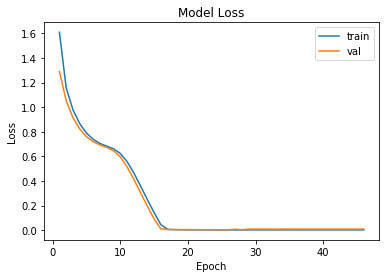


Estimating AUCROC, acc
ROC value: 0.9995
Acc: 0.9990
CMatrix: [[999   1]
 [  1 999]]


In [50]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)


## Rede Neural com normalização em Batch

In [51]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [52]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 80)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
     
    #--------------------------
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)      
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [53]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [54]:
X_train.shape

(18000, 3497)

In [55]:
model=get_model(X_train.shape[1])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3497)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 80)                279840    
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
activation_6 (Activation)    (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               16200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
activation_7 (Activation)    (None, 200)               0         
__________

Train on 18000 samples, validate on 2000 samples
Epoch 1/1000
 - 9s - loss: 1.2794 - acc: 0.5000 - val_loss: 0.9271 - val_acc: 0.5000
Epoch 2/1000
 - 9s - loss: 0.8395 - acc: 0.5000 - val_loss: 0.7257 - val_acc: 0.5000
Epoch 3/1000
 - 9s - loss: 0.6731 - acc: 0.5000 - val_loss: 0.5927 - val_acc: 0.5000
Epoch 4/1000
 - 9s - loss: 0.5502 - acc: 0.5000 - val_loss: 0.4784 - val_acc: 0.5000
Epoch 5/1000
 - 9s - loss: 0.4424 - acc: 0.5573 - val_loss: 0.3741 - val_acc: 0.9810
Epoch 6/1000
 - 9s - loss: 0.3404 - acc: 0.9356 - val_loss: 0.2765 - val_acc: 0.9985
Epoch 7/1000
 - 9s - loss: 0.2434 - acc: 0.9949 - val_loss: 0.1849 - val_acc: 0.9985
Epoch 8/1000
 - 9s - loss: 0.1564 - acc: 0.9982 - val_loss: 0.1017 - val_acc: 0.9990
Epoch 9/1000
 - 9s - loss: 0.0854 - acc: 0.9986 - val_loss: 0.0305 - val_acc: 0.9995
Epoch 10/1000
 - 9s - loss: 0.0393 - acc: 0.9969 - val_loss: 0.0033 - val_acc: 0.9995
Epoch 11/1000
 - 9s - loss: 0.0173 - acc: 0.9992 - val_loss: 0.0028 - val_acc: 0.9990
Epoch 12/1000


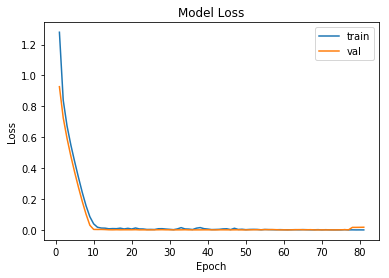


Estimating AUCROC, acc
ROC value: 0.9995
Acc: 0.9985
CMatrix: [[999   1]
 [  2 998]]


In [57]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

## Rede Neural com Dropout

In [58]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [59]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = Activation('relu')(x)
    x = Dropout(0.7)(x)
    
    #--------------------------
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)   
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x) 
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)    
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [60]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [61]:
X_train.shape

(18000, 3497)

In [62]:
model=get_model(X_train.shape[1])

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3497)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               699600    
_________________________________________________________________
activation_11 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_12 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
__________

In [ ]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

Train on 18000 samples, validate on 2000 samples
Epoch 1/1000
 - 13s - loss: 1.7104 - acc: 0.5000 - val_loss: 1.3760 - val_acc: 0.5000
Epoch 2/1000
 - 12s - loss: 1.2564 - acc: 0.5000 - val_loss: 1.1475 - val_acc: 0.5000
Epoch 3/1000
 - 12s - loss: 1.0739 - acc: 0.5000 - val_loss: 1.0026 - val_acc: 0.5000
Epoch 4/1000
 - 12s - loss: 0.9495 - acc: 0.5000 - val_loss: 0.8981 - val_acc: 0.5000
Epoch 5/1000
 - 12s - loss: 0.8591 - acc: 0.5000 - val_loss: 0.8200 - val_acc: 0.5000
Epoch 6/1000
 - 12s - loss: 0.7915 - acc: 0.5000 - val_loss: 0.7637 - val_acc: 0.5000
Epoch 7/1000
 - 12s - loss: 0.7452 - acc: 0.5000 - val_loss: 0.7264 - val_acc: 0.5000
Epoch 8/1000
 - 12s - loss: 0.7168 - acc: 0.4997 - val_loss: 0.7056 - val_acc: 0.5000
Epoch 9/1000
 - 12s - loss: 0.7016 - acc: 0.4996 - val_loss: 0.6961 - val_acc: 0.5000
Epoch 10/1000
 - 12s - loss: 0.6957 - acc: 0.5039 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 11/1000
 - 12s - loss: 0.6943 - acc: 0.5130 - val_loss: 0.6917 - val_acc: 0.5000
Epo

## Rede Neural com  normalização em Batch e Dropout

In [ ]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.7)(x)
    
    #--------------------------
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)   
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)  
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)    
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [ ]:
X_train.shape

In [ ]:
model=get_model(X_train.shape[1])

In [ ]:
model.summary()

In [ ]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

In [ ]:
##Rede Neural - LSTM

In [ ]:
keras.layers.LSTM(units, activation='tanh', 
    recurrent_activation='hard_sigmoid', use_bias=True, 
    kernel_initializer='glorot_uniform', 
    recurrent_initializer='orthogonal', 
    bias_initializer='zeros',
    unit_forget_bias=True,
                  
    kernel_regularizer=None, 
    recurrent_regularizer=None, 
    bias_regularizer=None, activity_regularizer=None,    
    kernel_constraint=None, recurrent_constraint=None, 
    bias_constraint=None, 
    dropout=0.0, recurrent_dropout=0.0, 
    implementation=1, return_sequences=False,
    return_state=False, go_backwards=False, 
    stateful=False, unroll=False)

In [ ]:
# First, let's define a RNN Cell, as a layer subclass.

class LSTM(keras.layers.LSTM):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(LSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = LSTM(32)
x = keras.Input((None, 5))
layer = LSTM(cell)
y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [LSTM(32), LSTM(64)]
x = keras.Input((None, 5))
layer = LSTM(cells)
y = layer(x)

In [ ]:
# First, let's define a RNN Cell, as a layer subclass.

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)
x = keras.Input((None, 5))
layer = RNN(cell)
y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [MinimalRNNCell(32), MinimalRNNCell(64)]
x = keras.Input((None, 5))
layer = RNN(cells)
y = layer(x)